ORDINAL LOGISTIC REGRESSION

1. Libraries and data importation

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, cohen_kappa_score
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/Student_performance_data_new_GradeClass.csv')
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,totalActivities
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2,1
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1,0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4,0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3,1
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,1,1
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,1,1
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,4,1
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,4,2


In [3]:
numeric_columns = df.select_dtypes(include=['number']).drop(['StudentID', 'GPA', 'Age','Extracurricular', 'Sports', 'Music', 'Volunteering', 'totalActivities'], axis=1).columns
numeric_columns 


Index(['Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'GradeClass'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   int64  
 15  totalActivities    2392 non-null   int64  
dtypes: float64(2), int64(14)

In [5]:
X = df.drop(columns=["StudentID", "GradeClass", "GPA"])
X

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,totalActivities
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,1
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,1
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0,1
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0,1
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1,1
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0,2


In [6]:
y = df["GradeClass"]
y

0       2
1       1
2       4
3       3
4       4
       ..
2387    1
2388    1
2389    4
2390    4
2391    3
Name: GradeClass, Length: 2392, dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2. Ordinal Logistic Model training with statmodel (no ordinal logistic regression with scikit learn)

Source : https://medium.com/@jumbongjunior1999/ordinal-logistic-regression-in-python-and-r-f6ee05d48d16

In [8]:
mod_log = OrderedModel(
    y_train,
    X_train,
    distr='logit'
)

result = mod_log.fit(method='bfgs')
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.380197
         Iterations: 74
         Function evaluations: 78
         Gradient evaluations: 78
                             OrderedModel Results                             
Dep. Variable:             GradeClass   Log-Likelihood:                -727.32
Model:                   OrderedModel   AIC:                             1489.
Method:            Maximum Likelihood   BIC:                             1583.
Date:                Fri, 22 Aug 2025                                         
Time:                        09:54:04                                         
No. Observations:                1913                                         
Df Residuals:                    1896                                         
Df Model:                          13                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------

First interpretation of the results: 

A. Significant variables (the more negative the value, the better the grade, and the more positive the value, the worse the grade).

- StudyTimeWeekly (-0.2615), i.e. the more a student studies per week, the more likely they are to be in a better class (A or B). 

- Absences (0.9220), i.e. the greater the number of hours of absence, the greater the risk of falling into classes F, D, C. 

- Tutoring (-2.3446), i.e. having tutoring strongly reduces the chances of getting a bad grade (highly significant effect).

- ParentalSupport (-1.3510), i.e. good parental support is a strong predictor of success.

B. Non-significant variables (cf. pvalue)

- Age (pvalue = 0.938 so no effect at all).

- Gender (0.197, no significant effect).

- Ethnicity (0.214, not significant). 

- ParentalEducation (0.696, not significant).

3. Prediction and statistical analysis of the results

In [9]:
predicted = result.predict(X_test)
predicted

,0,1,2,3,4
1004,6.075389e-09,6.179486e-07,6.817539e-05,5.935734e-03,9.939955e-01
196,3.600067e-03,2.670646e-01,7.054794e-01,2.357766e-02,2.782797e-04
2342,8.286916e-08,8.428839e-06,9.291066e-04,7.518732e-02,9.238751e-01
1708,5.791529e-01,4.138221e-01,6.960769e-03,6.342894e-05,7.308193e-07
435,1.174942e-13,1.195074e-11,1.318560e-09,1.154947e-07,9.999999e-01
...,...,...,...,...,...
986,1.783540e-07,1.814067e-05,1.997479e-03,1.486110e-01,8.493732e-01
120,6.940964e-06,7.054867e-04,7.216615e-02,8.005632e-01,1.265582e-01
283,1.863434e-04,1.859761e-02,6.597495e-01,3.160994e-01,5.367191e-03
1740,7.682823e-05,7.753279e-03,4.574538e-01,5.217957e-01,1.292044e-02


In [10]:
predicted_class = predicted.values.argmax(axis=1)
predicted_class

array([4, 2, 4, 0, 4, 2, 4, 3, 3, 4, 2, 4, 1, 2, 2, 4, 4, 4, 3, 2, 3, 4,
       4, 1, 4, 4, 4, 2, 3, 4, 4, 4, 1, 1, 4, 4, 1, 2, 1, 4, 2, 1, 4, 3,
       4, 2, 1, 4, 2, 4, 1, 1, 4, 4, 4, 1, 3, 1, 4, 3, 4, 4, 3, 4, 4, 3,
       1, 2, 4, 1, 0, 4, 1, 2, 4, 2, 4, 4, 4, 4, 4, 1, 3, 4, 4, 4, 0, 4,
       4, 4, 2, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 3, 4, 4, 4, 3, 2, 4, 4, 4,
       4, 4, 1, 4, 4, 4, 4, 2, 4, 4, 4, 1, 1, 4, 3, 4, 2, 4, 3, 2, 4, 0,
       2, 4, 4, 4, 3, 4, 4, 4, 2, 4, 1, 4, 1, 4, 4, 3, 2, 4, 1, 4, 1, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 1, 4, 1, 2, 4, 4, 2,
       3, 4, 3, 4, 2, 4, 4, 1, 2, 2, 1, 4, 4, 3, 4, 3, 4, 4, 4, 4, 4, 3,
       2, 3, 4, 1, 4, 3, 2, 4, 4, 1, 3, 4, 4, 4, 3, 2, 2, 4, 2, 1, 4, 2,
       4, 3, 0, 4, 4, 4, 1, 2, 4, 3, 4, 4, 2, 4, 2, 2, 4, 4, 2, 4, 0, 4,
       4, 3, 4, 4, 3, 4, 4, 4, 4, 2, 2, 4, 2, 4, 4, 3, 4, 4, 4, 4, 4, 4,
       4, 1, 3, 4, 2, 3, 4, 1, 4, 4, 4, 3, 4, 4, 4, 2, 1, 2, 4, 4, 1, 3,
       4, 4, 4, 4, 0, 3, 2, 4, 2, 4, 2, 4, 4, 2, 2,

In [11]:
print("Accuracy:", accuracy_score(y_test, predicted_class))

Accuracy: 0.826722338204593


Confusion Matrix:
 [[ 10   6   0   0   0]
 [  1  35  13   0   0]
 [  0  11  60   9   0]
 [  0   0  11  57  17]
 [  0   0   0  15 234]]


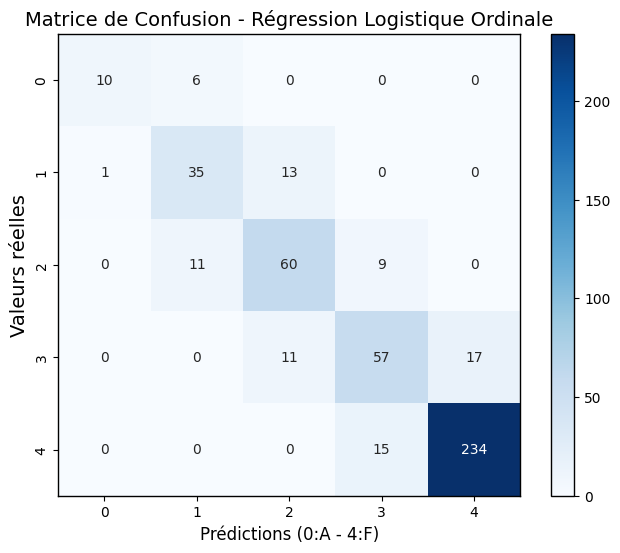

In [12]:
print("Confusion Matrix:\n", confusion_matrix(y_test, predicted_class))
labels = ['A', 'B', 'C', 'D', 'F']
cm = confusion_matrix(y_test, predicted_class)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',cbar=True, square=True, ax=ax)
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1)
    spine.set_color('black')

cbar = ax.collections[0].colorbar
cbar.outline.set_linewidth(1)
cbar.outline.set_edgecolor('black')

ax.set_title('Matrice de Confusion - Régression Logistique Ordinale',fontsize=14)
ax.set_xlabel('Prédictions (0:A - 4:F)',fontsize=12)
ax.set_ylabel('Valeurs réelles',fontsize=14)
plt.savefig("mat_conf.pdf")
plt.show()

In [13]:
print(classification_report(y_test, predicted_class, target_names=["A","B","C","D","F"]))

              precision    recall  f1-score   support

           A       0.91      0.62      0.74        16
           B       0.67      0.71      0.69        49
           C       0.71      0.75      0.73        80
           D       0.70      0.67      0.69        85
           F       0.93      0.94      0.94       249

    accuracy                           0.83       479
   macro avg       0.79      0.74      0.76       479
weighted avg       0.83      0.83      0.83       479



Interpretation of the matrix: better to have large values on the diagonals and small ones on the ends. Here, we can see that F is particularly well predicted (234) and we have a majority of 0s on the sides, so that's good. We tend to invert D and F, or B with C and D.

Interpretation of precision by letter: F best predicted, followed by D.

For B, C and D, it is estill reasonable (average performance). For F, excellent detection (probably linked to the fact that this is the most common class with 249 cases here).

Conclusion: Good model and good performance. Recall is a little low (due to rare classes like A and over-represented classes like F).

In [14]:
mae = mean_absolute_error(y_test, predicted_class)
kappa = cohen_kappa_score(y_test, predicted_class, weights='quadratic')
rho, _ = spearmanr(y_test, predicted_class)

print("MAE:", mae)
print("Kappa quadratique:", kappa)
print("Spearman rho:", rho)

MAE: 0.1732776617954071
Kappa quadratique: 0.9365501149876554
Spearman rho: 0.9268009443922948


4. Prediction and Training with K = 5 Folds 

In [15]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

accs = []
true = []
pred = []

for train_index, test_index in kf.split(X):
    X_train_5fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_5fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    model = OrderedModel(y_train_5fold, X_train_5fold, distr='logit')
    result = model.fit(method='bfgs', disp=False)
    
    pred_probs = result.predict(X_test_fold)
    pred_class = pred_probs.values.argmax(axis=1)
    
    true.extend(y_test_fold)
    pred.extend(pred_class)
    
    acc = accuracy_score(y_test_fold, pred_class)
    accs.append(acc)

print(f"Accuracy moy avec 5 folds: {np.mean(accs):.4f}")
print("\nClassification (sur tous les folds):")
print(classification_report(true, pred, target_names=["A", "B", "C", "D", "F"]))

c:\Users\romal\anaconda3\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


Accuracy moy avec 5 folds: 0.8282

Classification (sur tous les folds):
              precision    recall  f1-score   support

           A       0.71      0.57      0.63        77
           B       0.69      0.71      0.70       244
           C       0.70      0.71      0.71       385
           D       0.68      0.69      0.68       412
           F       0.95      0.95      0.95      1274

    accuracy                           0.83      2392
   macro avg       0.75      0.73      0.73      2392
weighted avg       0.83      0.83      0.83      2392



c:\Users\romal\anaconda3\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
